# 

In [8]:
#from langchain.llms import OpenAI
!pip install langchain_google_genai

   ---------------------------------------- 0.0/137.4 kB ? eta -:--:--
   ----------------- ---------------------- 61.4/137.4 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 133.1/137.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 137.4/137.4 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/598.7 kB ? eta -:--:--
   -- ------------------------------------- 30.7/598.7 kB ? eta -:--:--
   -------- ------------------------------- 122.9/598.7 kB 1.8 MB/s eta 0:00:01
   ------------- -------------------------- 204.8/598.7 kB 1.8 MB/s eta 0:00:01
   ------------------ --------------------- 276.5/598.7 kB 1.9 MB/s eta 0:00:01
   --------------------- ------------------ 327.7/598.7 kB 1.6 MB/s eta 0:00:01
   --------------------------- ------------ 409.6/598.7 kB 1.7 MB/s eta 0:00:01
   ------------------------------- -------- 471.0/598.7 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 573.4/598.7 kB 1.6 MB/s

In [5]:
pip install google-generativeai

   ---------------------------------------- 0.0/142.1 kB ? eta -:--:--
   -- ------------------------------------- 10.2/142.1 kB ? eta -:--:--
   -------- ------------------------------ 30.7/142.1 kB 445.2 kB/s eta 0:00:01
   ---------------------- ---------------- 81.9/142.1 kB 657.6 kB/s eta 0:00:01
   ------------------------------ ------- 112.6/142.1 kB 731.4 kB/s eta 0:00:01
   -------------------------------------- 142.1/142.1 kB 649.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/663.6 kB ? eta -:--:--
   ------------------ --------------------- 307.2/663.6 kB 6.3 MB/s eta 0:00:01
   ------------------------------ --------- 512.0/663.6 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------  655.4/663.6 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 663.6/663.6 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/138.3 kB ? eta -:--:--
   -------------------------------------- - 133.1/138.3 kB ? eta -:--:--
  

In [1]:
import google.generativeai as genai
import os

In [2]:
genai.configure(api_key = os.getenv("GOOGLE_API_KEY"))

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [4]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

In [5]:
from dotenv import load_dotenv

In [6]:
load_dotenv('api.env')

True

In [7]:
def generate_answer():
    model = ChatGoogleGenerativeAI(model = "gemini-pro", temperature = 0)
    #llm = OpenAI(temperature = 0)
    answer = model.invoke("""One mole of an ideal gas expands adiabatically from an initial state (TA, Vo) to final state (Tf, 5Vo). Another mole of the same gas expands isothermally from a different initial state (TB, V0) to the same final state (Tf, 5Vo). The ratio of the specific heats at constant pressure and constant volume of this ideal gas is gamma. What is the ratio TA/TB. Note : A state is represented as (x,y) where x stands for the temperature of the gas and y stands for its volume
    ˆ

    """)
    
    return answer.content

In [8]:
print(generate_answer())

For an adiabatic process, we have:

PV^(γ) = constant

For the first mole of gas, we have:

P1V0^(γ) = P2(5V0)^(γ)

Since the pressure is the same in both cases, we have:

V0^(γ) = 5^(γ)V0^(γ)

Therefore, γ = 1.

For an isothermal process, we have:

PV = constant

For the second mole of gas, we have:

P1V0 = P2(5V0)

Since the pressure is the same in both cases, we have:

V0 = 5V0

Therefore, TA/TB = (V0/5V0)^γ = (1/5)^1 = 1/5.


In [10]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

In [25]:
def generate_answer2(jee_problem):
    llm = ChatGoogleGenerativeAI(model = "gemini-pro", temperature = 0)

    prompt_template_name = PromptTemplate(
        input_variables = ['jee_problem'],
        template ="""Identify and behave as three different experts that are appropriate to answering this question.
All experts will write down the step and their thinking about the step, then share it with the group.
Then, all experts will go on to the next step, etc.
At each step all experts will score their peers response between 1 and 5, 1 meaning it is highly unlikely, and 5 meaning it is highly likely.
If any expert is judged to be wrong at any point then they leave.
After all experts have provided their analysis, you then analyze all 3 analyses and provide best guess solution with the final answer only.
The question is... provided in the input variable...{jee_problem} """

    
    )
    answer_chain = LLMChain(llm = llm, prompt = prompt_template_name)
    response = answer_chain({'jee_problem': jee_problem})
    return response

In [21]:
quest = "One mole of an ideal gas expands adiabatically from an initial state (TA, Vo) to final state (Tf, 5Vo). Another mole of the same gas expands isothermally from a different initial state (TB, V0) to the same final state (Tf, 5V0). The ratio of the specific heats at constant pressure and constant volume of this ideal gas is gamma. What is the ratio TA/TB"
print(generate_answer2(quest))

{'jee_problem': 'One mole of an ideal gas expands adiabatically from an initial state (TA, Vo) to final state (Tf, 5Vo). Another mole of the same gas expands isothermally from a different initial state (TB, V0) to the same final state (Tf, 5V0). The ratio of the specific heats at constant pressure and constant volume of this ideal gas is gamma. What is the ratio TA/TB', 'text': '**Expert 1: Thermodynamics Expert**\n\n**Step 1:**\n\n* **Thinking:** Adiabatic expansion means no heat is transferred in or out of the system. Therefore, the first law of thermodynamics gives:\n\n```\ndQ = dU + dW\n```\n\n* **Step:** Since dQ = 0, we have:\n\n```\ndU = -dW\n```\n\n**Step 2:**\n\n* **Thinking:** For an ideal gas, the internal energy is a function of temperature only. Therefore, we can write:\n\n```\ndU = CvdT\n```\n\n* **Step:** Substituting into the previous equation, we get:\n\n```\nCvdT = -dW\n```\n\n**Step 3:**\n\n* **Thinking:** For adiabatic expansion, the work done is given by:\n\n```\nd

In [26]:
def generate_answer3(jee_problem):
    llm = ChatGoogleGenerativeAI(model = "gemini-pro", temperature = 0)

    prompt_template_name = PromptTemplate(
        input_variables = ['jee_problem'],
        template ="""You are an expert in the field of thermodynamics and in the kinetic theory of gases. You are faced with the following question. Take care to properly understand the question and look at the keywords before trying to solve the question. Also look into possible points given in the question which could be really important for calculating the final answer. Based on the question, try to find what is given and what is to be found. After this, try to look into all the formulae that you know in this topic and find the formulae that might link the given parameters to the final answer. After this,write only the final answer that you found. Here's the question:
The question is... provided in the input variable...{jee_problem} """

    
    )
    answer_chain = LLMChain(llm = llm, prompt = prompt_template_name)
    response = answer_chain({'jee_problem': jee_problem})
    return response

In [24]:
quest = "One mole of an ideal gas expands adiabatically from an initial state (TA, Vo) to final state (Tf, 5Vo). Another mole of the same gas expands isothermally from a different initial state (TB, V0) to the same final state (Tf, 5Vo). The ratio of the specific heats at constant pressure and constant volume of this ideal gas is gamma. What is the ratio TA/TB. Note : A state is represented as (x,y) where x stands for the temperature of the gas and y stands for its volume."
print(generate_answer3(quest))

{'jee_problem': 'One mole of an ideal gas expands adiabatically from an initial state (TA, Vo) to final state (Tf, 5Vo). Another mole of the same gas expands isothermally from a different initial state (TB, V0) to the same final state (Tf, 5Vo). The ratio of the specific heats at constant pressure and constant volume of this ideal gas is gamma. What is the ratio TA/TB. Note : A state is represented as (x,y) where x stands for the temperature of the gas and y stands for its volume.', 'text': 'TA/TB = (5^(gamma-1))'}


In [26]:
###### Got the correct answer with the above prompt, without even giving input image

In [9]:
#from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
from langchain.chains import SequentialChain
from langchain.memory import SimpleMemory

In [ ]:
#A container has a base of 50 cm × 5 cm and height 50 cm, as shown in the figure. It has two parallel electrically
# conducting walls each of area 50 cm × 50 cm. The remaining walls of the container are thin and non-conducting.
# The container is being filled with a liquid of dielectric constant 3 at a uniform rate of 250 cm3 s^(-1)
# . What is the value of the capacitance of the container after 10 seconds?
# [Given: Permittivity of free space epsilonnot
# = 9 × 10−12 C^2 N^-1 m^-2

# , the effects of the non-conducting walls on the
# capacitance are negligible]

In [45]:
llm = ChatGoogleGenerativeAI(model = "gemini-pro", temperature = 0.3)
# prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    """You are an expert in the field of physics particularly gravitational field. You are faced with the following question. Take care to properly understand the question and look at the keywords before trying to solve the question. Also look into possible points given in the question which could be really important for calculating the final answer. Based on the question, try to find what is given and what is to be found. After this, try to look into all the formulae that you know in this topic and find the formulae that might link the given parameters to the final answer. After this,write only the final answer that you found. Here's the question:
The question is... provided in the input variable...{jee_problem} """
)

# Chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt, output_key="output_answer")

In [46]:
second_prompt = ChatPromptTemplate.from_template(
    "The answer: {output_answer} that you get for the input queston will be strictly from the one from the given options:{options}, if not then your answer is incorrect, so think again"
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt, output_key="final_answer")

In [151]:
given_options = "['27 pF', '63 pF', '81 pF', '135 pF']"
overall_chain = SequentialChain(
    memory=SimpleMemory(memories={
                        "options": given_options}),
    chains=[chain_one, chain_two],
    input_variables=["jee_problem"],
    output_variables=["output_answer","final_answer"],
    verbose=True
)

In [152]:
jee_problem = """A container has a base of 50 cm × 5 cm and height 50 cm, as shown in the figure. It has two parallel electrically
conducting walls each of area 50 cm × 50 cm. The remaining walls of the container are thin and non-conducting.
The container is being filled with a liquid of dielectric constant 3 at a uniform rate of 250 cm3 s^(-1)
. What is the value of the capacitance of the container after 10 seconds? Note that the part that is not yet filled with dielectric also works as capacitance so it also has some value of capaciatnce which needs to be added.
[Given: Permittivity of free space epsilonnot
= 9 × 10−12 C^2 N^-1 m^-2

, the effects of the non-conducting walls on the
capacitance are negligible]
"""
overall_chain(jee_problem)



> Entering new SequentialChain chain...

> Finished chain.


{'jee_problem': 'A container has a base of 50 cm × 5 cm and height 50 cm, as shown in the figure. It has two parallel electrically\nconducting walls each of area 50 cm × 50 cm. The remaining walls of the container are thin and non-conducting.\nThe container is being filled with a liquid of dielectric constant 3 at a uniform rate of 250 cm3 s^(-1)\n. What is the value of the capacitance of the container after 10 seconds? Note that the part that is not yet filled with dielectric also works as capacitance so it also has some value of capaciatnce which needs to be added.\n[Given: Permittivity of free space epsilonnot\n= 9 × 10−12 C^2 N^-1 m^-2\n\n, the effects of the non-conducting walls on the\ncapacitance are negligible]\n',
 'options': "['27 pF', '63 pF', '81 pF', '135 pF']",
 'output_answer': 'C = 2.25 x 10^-10 F',
 'final_answer': 'C = 2.25 x 10^-10 F\n\nThis answer is not from the given options, so it is incorrect.'}

In [54]:
jee_problem = """Two satellites P and Q are moving in different circular orbits around the Earth (radius R). The heights of P and Q from the Earth surface are hP and hQ, respectively, where hP =R/3 . The accelerations of P and Q due to Earth’s gravity are gPand gQ. respectively. If gP/gQ = 36/25. what is the value of hQ?
"""
overall_chain(jee_problem)



> Entering new SequentialChain chain...

> Finished chain.


{'jee_problem': 'Two satellites P and Q are moving in different circular orbits around the Earth (radius R). The heights of P and Q from the Earth surface are hP and hQ, respectively, where hP =R/3 . The accelerations of P and Q due to Earth’s gravity are gPand gQ. respectively. If gP/gQ = 36/25. what is the value of hQ?\n',
 'options': ['3R/5', 'R/6', '6R/5', '5R/5'],
 'output_answer': 'Given:\nhP = R/3\ngP/gQ = 36/25\n\nTo find:\nhQ\n\nFormula:\ng = GM/r^2\n\nwhere,\ng is the acceleration due to gravity\nG is the gravitational constant\nM is the mass of the Earth\nr is the distance from the center of the Earth\n\nUsing the formula, we can write:\n\ngP = GM/(R + hP)^2\ngQ = GM/(R + hQ)^2\n\nDividing gP by gQ, we get:\n\ngP/gQ = (R + hQ)^2/(R + hP)^2\n\nSubstituting the given values, we get:\n\n36/25 = (R + hQ)^2/(R + R/3)^2\n36/25 = (R + hQ)^2/(4R/3)^2\n36/25 = (R + hQ)^2/(16R^2/9)\n36/25 = 9(R + hQ)^2/16R^2\n(R + hQ)^2 = (36/25) * (16R^2/9)\n(R + hQ)^2 = (576/225) * R^2\nR + hQ = sqr

In [97]:
llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.3)
prompt_template = ChatPromptTemplate.from_template(
    """As an expert in physics, specializing in rigid body dynamics, Calculate what is asked based on this problem: {jee_problem}"""
)

# Define the LLM chain with the calculation prompt
calculation_chain = LLMChain(llm=llm, prompt=prompt_template, output_key="output_answer")

# Given options as a Python list for easier handling
given_options = ['1.2', '5.5', '5', '10']

jee_problem = """
 Two point-like objects of masses 20 gm and 30 gm are fixed at the two ends of a rigid massless rod of length 10 cm. This system is suspended vertically from a rigid ceiling using a thin wire attached to its center of mass, The resulting torsional pendulum undergoes small oscillations. The torsional constant of the wire is 1.2 * 10^(-8) N m rad^(-1)
 The angular frequency of the oscillations is in n* 10^(-3)rad s^(-1)
. The value of n is 
_____.

"""
# Manual loop for recalculating until a matching option is found
result = None
max_attempts = 5
attempts = 0

while attempts < max_attempts:
    response = calculation_chain(jee_problem)
    output_answer = response.get("output_answer", "")

    # Check if the answer is in the given options (handle unit conversions if necessary)
    if any(option in output_answer for option in given_options):
        result = output_answer
        break
    else:
        # Modify the problem slightly or ask the model to reconsider; this example asks the model to reconsider
        jee_problem += "\nPlease recalculate with special attention to units and numerical precision."
    
    attempts += 1

if result:
    print(f"Correct answer found: {result}")
else:
    print("Failed to find a correct answer after several attempts.")
print(output_answer)
output_soln = output_answer

Correct answer found: The angular frequency of a torsional pendulum is given by:

$$\omega = \sqrt{\frac{k}{I}}$$

where:

* $\omega$ is the angular frequency in rad/s
* $k$ is the torsional constant in N m rad^(-1)
* $I$ is the moment of inertia in kg m^2

The moment of inertia of a point-like object of mass $m$ at a distance $r$ from the axis of rotation is given by:

$$I = mr^2$$

In this case, we have two point-like objects of masses $m_1 = 20$ gm and $m_2 = 30$ gm at distances $r_1 = 5$ cm and $r_2 = 5$ cm from the axis of rotation, respectively. The total moment of inertia is therefore:

$$I = m_1r_1^2 + m_2r_2^2 = (20 \times 10^{-3} \text{ kg})(5 \times 10^{-2} \text{ m})^2 + (30 \times 10^{-3} \text{ kg})(5 \times 10^{-2} \text{ m})^2 = 2.5 \times 10^{-5} \text{ kg m}^2$$

Substituting this into the equation for the angular frequency, we get:

$$\omega = \sqrt{\frac{k}{I}} = \sqrt{\frac{1.2 \times 10^{-8} \text{ N m rad}^{-1}}{2.5 \times 10^{-5} \text{ kg m}^2}} = 2.19 \times 1

In [89]:
output_soln

'The angular frequency of a torsional pendulum is given by:\n\n$$\\omega = \\sqrt{\\frac{k}{I}}$$\n\nwhere:\n\n* k is the torsional constant\n* I is the moment of inertia\n\nThe moment of inertia of a point-like object is given by:\n\n$$I = mr^2$$\n\nwhere:\n\n* m is the mass\n* r is the distance from the axis of rotation\n\nThe moment of inertia of the system is the sum of the moments of inertia of the two point-like objects:\n\n$$I = m_1r_1^2 + m_2r_2^2$$\n\nwhere:\n\n* m_1 = 20 gm = 0.02 kg\n* r_1 = 5 cm = 0.05 m\n* m_2 = 30 gm = 0.03 kg\n* r_2 = 5 cm = 0.05 m\n\nSubstituting these values into the equation for the moment of inertia, we get:\n\n$$I = (0.02 kg)(0.05 m)^2 + (0.03 kg)(0.05 m)^2 = 5 * 10^{-5} kg m^2$$\n\nSubstituting the values of k and I into the equation for the angular frequency, we get:\n\n$$\\omega = \\sqrt{\\frac{1.2 * 10^{-8} N m rad^{-1}}{5 * 10^{-5} kg m^2}} = 4.24 * 10^{-2} rad s^{-1}$$\n\nTherefore, the angular frequency of the oscillations is 4.24 * 10^(-2) r

In [15]:
output_solution = "6.75 * 10**(-11) F"

In [17]:
import re

In [155]:
def compare_answer_with_options(output_answer, given_options, llm):
    # Regular expression to extract numerical and unit parts from the answer
    match = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", output_answer)
    if match:
        numerical_part = float(match.group(1))
        unit_part = match.group(2).lower()

        # Check if the unit part matches any unit in the given options
        if unit_part in given_options:
            # If the unit matches, compare the numerical part with the numerical parts of the options
            for option in given_options:
                match_option = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", option)
                if match_option:
                    numerical_part_option = float(match_option.group(1))
                    if numerical_part == numerical_part_option:
                        return "Correct answer found: " + output_answer
            return "Numerical part doesn't match any option."
        else:
            # If the unit doesn't match, prompt to convert the answer to the desired units from the given options
            conversion_prompt_template = ChatPromptTemplate.from_template(
                f"Convert the units from {unit_part} to one of the units in the given options: {given_options}. Then compare the numerical part. Use units and dimension concept."
            )
            conversion_chain = LLMChain(llm=llm, prompt=conversion_prompt_template, output_key="conversion_prompt")
            conversion_response = conversion_chain({"": ""})
            return conversion_response["conversion_prompt"]
    else:
        return "Unable to parse the answer."

# Example usage
output_answer = "66.4 gF"  # Example output answer
given_options = ["27 fF", "63 mF", "81 pF", "135 pF"]
llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.2)

result = compare_answer_with_options(output_answer, given_options, llm)
print(result)


1 gf = 10^-9 F

Converting the given options to farads:

'27 fF' = 27 x 10^-15 F
'63 mF' = 63 x 10^-3 F
'81 pF' = 81 x 10^-12 F
'135 pF' = 135 x 10^-12 F

Comparing the numerical part:

10^-9 F > 81 x 10^-12 F > 135 x 10^-12 F > 27 x 10^-15 F > 63 x 10^-3 F

Therefore, 1 gf is numerically greater than 81 pF, 135 pF, 27 fF, and less than 63 mF.


In [23]:
def compare_answer_with_options(output_answer, given_options, llm):
    # Regular expression to extract numerical and unit parts from the answer
    match = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", output_answer)
    if match:
        numerical_part = float(match.group(1))
        unit_part = match.group(2).lower()

        # Check if the unit part matches any unit in the given options
        if unit_part in given_options:
            # If the unit matches, compare the numerical part with the numerical parts of the options
            for option in given_options:
                match_option = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", option)
                if match_option:
                    numerical_part_option = float(match_option.group(1))
                    if numerical_part == numerical_part_option:
                        return "Correct answer found: " + output_answer
            return "Numerical part matches, but unit doesn't match any option."
        else:
            # If the unit doesn't match, prompt to convert the answer to the desired units from the given options
            conversion_prompt_template = ChatPromptTemplate.from_template(
                f"Convert the units from {unit_part} to one of the units in the given options: {given_options}. Then compare the numerical part. output_key_answer is the final answer after conversion. Use units and dimension concept. Format the output with the following key, output_key_answer: {output_key_answer}."
            )
            conversion_chain = LLMChain(llm=llm, prompt=conversion_prompt_template, output_key="output_key_answer")
            conversion_response = conversion_chain({"": ""})
            return conversion_response["conversion_prompt"]
    else:
        return "Unable to parse the answer."

# Example usage
output_answer = "27 pF"  # Example output answer
given_options = ["27 pF", "63 pF", "81 fF", "135 mF"]
llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.2)

result = compare_answer_with_options(output_answer, given_options, llm)
print(result)


1 pF = 10^-12 F

Converting 27 pF to F:

27 pF = 27 * 10^-12 F = 2.7 * 10^-11 F

Comparing the numerical part with the given options:

2.7 * 10^-11 F is numerically smaller than all the given options.

Therefore, 27 pF is the smallest capacitance value among the given options.


In [108]:
#from transformers import pipeline
import re

def compare_answer_with_options(output_answer, given_options, llm):
    # Regular expression to extract numerical and unit parts from the output answer
    match_output = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", output_answer)
    if match_output:
        numerical_part_output = float(match_output.group(1))
        unit_part_output = match_output.group(2).lower()

        # Loop through each given option
        for option in given_options:
            # Regular expression to extract numerical and unit parts from the option
            match_option = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", option)
            if match_option:
                numerical_part_option = float(match_option.group(1))
                unit_part_option = match_option.group(2).lower()

                # Convert unit of option to match unit of output answer
                conversion_prompt_template = ChatPromptTemplate.from_template(
                f"Convert {numerical_part_option} {unit_part_option} to {unit_part_output}, and show the interconversion steps"
                )
                conversion_chain = LLMChain(llm=llm, prompt=conversion_prompt_template, output_key="conversion_prompt")
                conversion_response = conversion_chain({"": ""})
                conv_resp = conversion_response["conversion_prompt"]
                print(conv_resp)
                # conversion_prompt_template = f"Convert {numerical_part_option} {unit_part_option} to {unit_part_output}"
                # conversion_chain = llm(conversion_prompt_template)
                # conversion_response = conversion_chain.result[0]["generated_text"]
                
                # Extract converted numerical part from the response
                match_converted_numerical = re.search(r"([0-9.]+)", conv_resp)
                if match_converted_numerical:
                    converted_numerical_part_option = float(match_converted_numerical.group(1))

                    # Check if converted numerical part of option matches numerical part of output answer
                    if numerical_part_output == converted_numerical_part_option:
                        return f"Correct answer found: {output_answer} matches {option} from the given options."

        return "No matching option found."

    else:
        return "Unable to parse the output answer."


# Example usage
output_answer = "81 picofarad"  # Example output answer
given_options = ["27 milliFarad", "63 milliFarad", "81 picofarad", "135 milliFarad"]
#llm = pipeline("text-generation", model="your_llm_model_name", device=0)
llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.2)
result = compare_answer_with_options(output_answer, given_options, llm)
print(result)


**1 millifarad (mF) = 1,000,000 picofarad (pF)**

**Conversion steps:**

1. Multiply the value in millifarads by 1,000,000 to convert to picofarads:

```
27.0 mF x 1,000,000 = 27,000,000 pF
```

Therefore, 27.0 millifarad is equal to **27,000,000 picofarad**.
**1 millifarad (mF) = 1,000,000 picofarad (pF)**

**Conversion steps:**

1. Multiply the value in millifarads by 1,000,000 to convert to picofarads:

```
63.0 mF * 1,000,000 pF/mF = 63,000,000 pF
```

Therefore, 63.0 millifarad is equal to **63,000,000 picofarad**.
**1 picofarad (pF) = 1 x 10^-12 farad (F)**

**81.0 picofarad (pF) = 81.0 x 10^-12 farad (F)**

**Interconversion steps:**

1. Multiply the picofarad value by 1:

```
81.0 picofarad x 1 = 81.0 picofarad
```

2. Multiply the picofarad value by the conversion factor (1 x 10^-12):

```
81.0 picofarad x 1 x 10^-12 = 81.0 x 10^-12 farad
```

Therefore, 81.0 picofarad is equal to 81.0 x 10^-12 farad.
**Step 1: Convert millifarad (mF) to farad (F)**

1 mF = 10^-3 F

**Step 2: 

In [115]:
import re
def compare_answer_with_options(output_answer, given_options, llm):
    # Regular expression to extract numerical and unit parts from the output answer
    match_output = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", output_answer)
    if match_output:
        numerical_part_output = float(match_output.group(1))
        unit_part_output = match_output.group(2).lower()

        # Loop through each given option
        for option in given_options:
            # Regular expression to extract numerical and unit parts from the option
            match_option = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", option)
            if match_option:
                numerical_part_option = float(match_option.group(1))
                unit_part_option = match_option.group(2).lower()
                # Convert unit of option to match unit of output answer
                conversion_prompt_template = ChatPromptTemplate.from_template(
                    f"Convert {numerical_part_option} {unit_part_option} to {unit_part_output}, and show the interconversion steps"
                )
                conversion_chain = LLMChain(llm=llm, prompt=conversion_prompt_template, output_key="conversion_prompt")
                conversion_response = conversion_chain({"": ""})
                conv_resp = conversion_response["conversion_prompt"]
                print(conv_resp)

                # Extract converted numerical part from the response
                match_converted_numerical = re.search(r"([0-9.]+)", conv_resp)
                if match_converted_numerical:
                     
                    converted_numerical_part_option = float(match_converted_numerical.group(1))

                    # Check if converted numerical part of option is approximately equal to numerical part of output answer
                    if abs(numerical_part_output - converted_numerical_part_option) < 0.5:  # Define your tolerance level here
                        return f"Correct answer found: {output_answer} matches {option} from the given options."

        return "No matching option found."

    else:
        return "Unable to parse the output answer."

output_answer = "63 pF"  # Example output answer
given_options = ["27 pF", "63 fF", "80 pF", "135 mF"]
llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.2)
result = compare_answer_with_options(output_answer, given_options, llm)
print(result)

**1.** Convert pf to f:

```
27.0 pf = 27.0 * 10^-12 f
```

**2.** Convert f to pf:

```
27.0 * 10^-12 f = 27.0 pf
```

Therefore, 27.0 pf is equal to 27.0 pf.
**1 femtofarad (ff) = 10^-15 farad (F)**

**1 picofarad (pF) = 10^-12 farad (F)**

**Conversion steps:**

1. Convert 63.0 ff to farads:

```
63.0 ff = 63.0 x 10^-15 F
```

2. Convert the result to picofarads:

```
63.0 x 10^-15 F = 63.0 x 10^-15 / 10^-12 F
```

```
= 63.0 x 10^-3 pF
```

**Therefore, 63.0 ff is equal to 63.0 pF.**
**1 picofarad (pF) = 10^-12 farad (F)**

**80.0 pF = 80.0 * 10^-12 F**

**= 8.00 * 10^-11 F**

**= 80.0 nF**

**Therefore, 80.0 pF is equal to 80.0 nF.**
**Step 1: Convert microfarads (µF) to farads (F)**

1 µF = 10^-6 F

135.0 µF = 135.0 x 10^-6 F = 0.000135 F

**Step 2: Convert farads (F) to picofarads (pF)**

1 F = 10^12 pF

0.000135 F = 0.000135 x 10^12 pF = **135 pF**

Therefore, 135.0 µF is equal to 135 pF.
No matching option found.


In [105]:
import re
def compare_answer_with_options(output_answer, given_options, llm):
    # Regular expression to extract numerical and unit parts from the output answer
    match_output = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", output_answer)
    if match_output:
        numerical_part_output = float(match_output.group(1))
        unit_part_output = match_output.group(2).lower()

        # Loop through each given option
        for option in given_options:
            # Regular expression to extract numerical and unit parts from the option
            match_option = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", option)
            if match_option:
                numerical_part_option = float(match_option.group(1))
                unit_part_option = match_option.group(2).lower()

                # Convert unit of option to match unit of output answer
                first_conversion_prompt_template = ChatPromptTemplate.from_template(
                    f"Convert {numerical_part_option} {unit_part_option} to {unit_part_output}, and show the interconversion steps "
                )
                conversion_chain_1 = LLMChain(llm=llm, prompt=1st_conversion_prompt_template, output_key="output_answer1")
                #conversion_response = conversion_chain({"": ""})
                #conv_resp = conversion_response["conversion_prompt"]
                #print(conv_resp)

                #2nd_conversation_prompt_template = 

                if option.lower() in conv_resp.lower():
                    return f"Correct answer found: {output_answer} matches {option} from the given options."

                # Extract converted numerical part from the response
                # match_converted_numerical = re.search(r"([0-9.]+)", conv_resp)
                # if match_converted_numerical:
                #     converted_numerical_part_option = float(match_converted_numerical.group(1))

                    # Check if converted numerical part of option is approximately equal to numerical part of output answer
                    # if abs(numerical_part_output - converted_numerical_part_option) < 0.5:  # Define your tolerance level here
                    #     return f"Correct answer found: {output_answer} matches {option} from the given options."

        return "No matching option found."

    else:
        return "Unable to parse the output answer."


output_answer = "81 picofarad"  # Example output answer
given_options = ["27 milliFarad", "63 milliFarad", "81000 femtoFarad", "135 milliFarad"]
#llm = pipeline("text-generation", model="your_llm_model_name", device=0)
llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.2)
result = compare_answer_with_options(output_answer, given_options, llm)
print(result)

SyntaxError: invalid decimal literal (3950164238.py, line 18)

In [109]:
def compare_answer_with_options(output_answer, given_options, llm):
    # Regular expression to extract numerical and unit parts from the output answer
    match_output = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", output_answer)
    if match_output:
        unit_part_output = match_output.group(2).lower()

        # Loop through each given option
        for option in given_options:
            # Regular expression to extract numerical and unit parts from the option
            match_option = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", option)
            if match_option:
                numerical_part_option = float(match_option.group(1))
                unit_part_option = match_option.group(2).lower()
                output_key_answer = """So, the final solution is : """

                # Convert unit of option to match unit of output answer
                conversion_prompt_template = ChatPromptTemplate.from_template(
                    f"Convert {numerical_part_option} {unit_part_option} to {unit_part_output}, and show the interconversion step.
                    Format the output with the following key, output_key_answer: {output_key_answer}."
            )}.
                
                conversion_chain = LLMChain(llm=llm, prompt=conversion_prompt_template, output_key="output_key_answer")
                conversion_response = conversion_chain({"": ""})
                conv_resp = conversion_response["output_key_answer"]
                print(conv_resp)
                # Check if the LLM-generated conversion matches the given option
                if option.lower() in conv_resp.lower():
                    return f"Correct answer found: {output_answer} matches {option} from the given options."

        return "No matching option found."

    else:
        return "Unable to parse the output answer."


output_answer = "81 picofarad"  # Example output answer
given_options = ["27 milliFarad", "63 milliFarad", "81000 femtoFarad", "135 milliFarad"]
#llm = pipeline("text-generation", model="your_llm_model_name", device=0)
llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.1)
result = compare_answer_with_options(output_answer, given_options, llm)
print(result)


SyntaxError: unterminated string literal (detected at line 18) (3163429706.py, line 18)

In [ ]:
for model in genai.list_models():
    print(model.name)

In [103]:
###MAIN
import re
#from openai_chatbot import ChatGoogleGenerativeAI

def compare_answer_with_options(output_answer, given_options, llm):
    # Regular expression to extract numerical and unit parts from the output answer
    match_output = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", output_answer)
    if match_output:
        numerical_part_output = float(match_output.group(1))
        unit_part_output = match_output.group(2).lower()

        # Loop through each given option
        for option in given_options:
            # Regular expression to extract numerical and unit parts from the option
            match_option = re.match(r"([0-9.]+)\s*([a-zA-Z]+)", option)
            if match_option:
                numerical_part_option = float(match_option.group(1))
                unit_part_option = match_option.group(2).lower()

                # Convert unit of option to match unit of output answer
                conversion_prompt = f"Convert {numerical_part_option} {unit_part_option} to {unit_part_output}"
                conversion_response = llm.submit_request(conversion_prompt).choices[0].text.strip()

                # Extract converted numerical part from the response
                match_converted_numerical = re.search(r"([0-9.]+)", conversion_response)
                if match_converted_numerical:
                    converted_numerical_part_option = float(match_converted_numerical.group(1))

                    # Check if converted numerical part of option matches numerical part of output answer
                    if numerical_part_output == converted_numerical_part_option:
                        return f"Correct answer found: {output_answer} matches {option} from the given options."

        return "No matching option found."

    else:
        return "Unable to parse the output answer."


# Example usage
output_answer = "27 pF"  # Example output answer
given_options = ["27 pF", "63 pF", "81 fF", "135 mF"]
llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.2)

result = compare_answer_with_options(output_answer, given_options, llm)
print(result)


AttributeError: 'ChatGoogleGenerativeAI' object has no attribute 'submit_request'

In [41]:
pip install Pillow



   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB 217.9 kB/s eta 0:00:12
   - -------------------------------------- 0.1/2.5 MB 563.7 kB/s eta 0:00:05
   - -------------------------------------- 0.1/2.5 MB 804.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.5 MB 1.1 MB/s eta 0:00:03
   ---- ----------------------------------- 0.3/2.5 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.5 MB 1.3 MB/s eta 0:00:02
   ------- -------------------------------- 0.5/2.5 MB 1.4 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.5 MB 1.4 MB/s eta 0:00:02
   --------- ------------------------------ 0.6/2.5 MB 1.4 MB/s eta 0:00:02
   ----------- ---------------------------- 0.7/2.5 MB 1.4 MB/s eta 0:00:02
   ------------ --------------------------- 0.8/2.5 MB 1.5 MB/s eta 0:00:02
   -------------- -

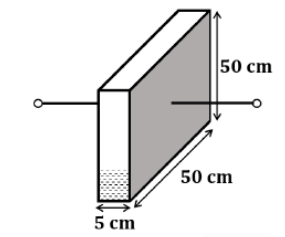

In [126]:
from PIL import Image
img1 = Image.open('cap_ques.png')
img1

In [18]:
from langchain_core.messages import HumanMessage
#llm = ChatGoogleGenerativeAI(model = "gemini-pro", temperature = 0)

In [127]:
llm2 = ChatGoogleGenerativeAI(model = "gemini-pro-vision")

In [48]:
# second_prompt = ChatPromptTemplate.from_template(
    
#     prompt = 'Take the input image for the given question for better clarity into consideration and reevaluate the answer. Check the answer from : {output_answer} if it satisfies if the input image for the question is taken : {img1} ' ,
#     message = HumanMessage(
#         content=[
#             {'type': 'text', 'text': prompt},
#             {'type': 'image_url', 'image_url': img1}
            
            
#         ]
#     )
    
# )    
# chain_two = LLMChain(llm=llm2, prompt=second_prompt, output_key="output_answer2")

In [135]:
llm = ChatGoogleGenerativeAI(model = "gemini-pro", temperature = 0)
# prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    """You are an expert in the field of physics particularly capacitors and dielectrics. You are faced with the following question. Take care to properly understand the question and look at the keywords before trying to solve the question. Also look into possible points given in the question which could be really important for calculating the final answer. Based on the question, try to find what is given and what is to be found. After this, try to look into all the formulae that you know in this topic and find the formulae that might link the given parameters to the final answer. After this,write only the final answer that you found. Here's the question:
The question is... provided in the input variable...{jee_problem}  """
)

# Chain 1
chain_one2 = LLMChain(llm=llm, prompt=first_prompt, output_key="output_answer")

In [147]:
import base64
# Read image data from file
with open("cap_ques.png", "rb") as image_file:
    image_data = image_file.read()

# Convert image data to Base64 encoding
image_data = base64.b64encode(image_data).decode("utf-8")

In [137]:
llm = ChatGoogleGenerativeAI(model = "gemini-pro", temperature = 0)
# prompt template 1
second_prompt = ChatPromptTemplate.from_template(
    """ Take the input image for the given question for better clarity into consideration and reevaluate the answer. Check the answer from : {output_answer} that you get from the first prompt as output if it satisfies if the input image for the question is taken : {image_data}  """
)

# Chain 2
chain_two2 = LLMChain(llm=llm, prompt=second_prompt, output_key="output_answer2")

In [138]:
third_prompt = ChatPromptTemplate.from_template(
    "The answer: {output_answer2} that you get for the input queston will be strictly from the one from the given options:{options}, if not then your answer is incorrect,THINK AGAIN GO THROUGH THE QUESTION AND AGAIN AND TRY TO SOLVE IT AGAIN"
)
# chain 3
chain_three2 = LLMChain(llm=llm, prompt=third_prompt, output_key="final_answer")

In [139]:
given_options = "['27 picofarad', '63 picofarad', '81 picofarad', '135 picofarad']"
overall_chain2 = SequentialChain(
    memory=SimpleMemory(memories={
                        "options": "given_options"}),
    chains=[chain_one2,chain_two2, chain_three2],
    input_variables=["jee_problem","image_data"],
    output_variables=["output_answer","output_answer2","final_answer"],
    verbose=True
)

In [140]:
jee_problem = """A container has a base of 50 cm × 5 cm and height 50 cm, as shown in the figure. It has two parallel electrically
conducting walls each of area 50 cm × 50 cm. The remaining walls of the container are thin and non-conducting.
The container is being filled with a liquid of dielectric constant 3 at a uniform rate of 250 cm3 s^(-1)
. What is the value of the capacitance of the container after 10 seconds? Note that the part that is not yet filled with dielectric also works as capacitance so it also has some value of capaciatnce which needs to be added.
[Given: Permittivity of free space epsilonnot
= 9 × 10−12 C^2 N^-1 m^-2

, the effects of the non-conducting walls on the
capacitance are negligible]"""
#overall_chain('jee_problem','img1')
overall_chain2({'jee_problem': jee_problem, 'image_data': image_data})



> Entering new SequentialChain chain...

> Finished chain.


{'jee_problem': 'A container has a base of 50 cm × 5 cm and height 50 cm, as shown in the figure. It has two parallel electrically\nconducting walls each of area 50 cm × 50 cm. The remaining walls of the container are thin and non-conducting.\nThe container is being filled with a liquid of dielectric constant 3 at a uniform rate of 250 cm3 s^(-1)\n. What is the value of the capacitance of the container after 10 seconds? Note that the part that is not yet filled with dielectric also works as capacitance so it also has some value of capaciatnce which needs to be added.\n[Given: Permittivity of free space epsilonnot\n= 9 × 10−12 C^2 N^-1 m^-2\n\n, the effects of the non-conducting walls on the\ncapacitance are negligible]',
 'image_data': 'iVBORw0KGgoAAAANSUhEUgAAAR0AAADtCAYAAACCj6HWAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAADfbSURBVHhe7Z0HmBPl2oY/GyqIIHI8oGDHLhakSa/SBQUFjqLYC6Ae7IpdbNhRLEdU7HhUeleKIEuXJqAUUbBib1jOv//cL/kwxiywSyaZTZ77uuba3cmkbJJ55u3fNvkBTggh0sS2s

In [42]:
print(img1)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=285x237 at 0x275C0F1EE50>


In [57]:
##### LEAVE UPLOADING IMAGE FOR NOW

In [1]:
!pip -q install wikipedia

In [124]:
from langchain.utilities import WikipediaAPIWrapper

In [125]:
wikipedia = WikipediaAPIWrapper()

In [3]:
wikipedia.run('Langchain')

"Page: LangChain\nSummary: LangChain is a framework designed to simplify the creation of applications using large language models (LLMs). As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\nPage: DataStax\nSummary: DataStax, Inc. is a real-time data for AI company based in Santa Clara, California. Its product Astra DB is a cloud database-as-a-service based on Apache Cassandra. DataStax also offers DataStax Enterprise (DSE), an on-premises database built on Apache Cassandra, and Astra Streaming, a messaging and event streaming cloud service based on Apache Pulsar. As of June 2022, the company has roughly 800 customers distributed in over 50 countries.\n\nPage: Sentence embedding\nSummary: In natural language processing, a sentence embedding refers to a numeric representation of a sentence in the form of a vector of real numbers which encod

In [118]:
from langchain.utilities import PythonREPL

In [119]:
python_repl = PythonREPL()

In [6]:
!pip -q install duckduckgo-search

In [120]:
from langchain.tools import DuckDuckGoSearchRun

In [121]:
search = DuckDuckGoSearchRun()

In [122]:
from langchain.agents import Tool
from langchain.tools import BaseTool

In [146]:
tools = [
    Tool(
        name = "python repl",
        func=python_repl.run,
        description="useful for when you need to use python to answer a question."
    )
]
wikipedia_tool = Tool(
    name='wikipedia',
    func= wikipedia.run,
    description="Useful for when you need to look up a topic"
)
duckduckgo_tool = Tool(
    name='DuckDuckGo Search',
    func= search.run,
    description="Useful for when you need to do a search on the internet to find information that another tool can't find. be specific with your input."
)
tools.append(duckduckgo_tool)
tools.append(wikipedia_tool)

In [142]:
llm = ChatGoogleGenerativeAI(model = "gemini-pro", temperature = 0)
from langchain.agents import initialize_agent

zero_shot_agent = initialize_agent(
    agent="zero-shot-react-description",
    tools=tools,
    llm=llm,
    verbose=True,
    max_iterations=3,
)

In [144]:
zero_shot_agent.run("""  On decreasing the pH from 7 to 2, the solubility of a sparingly soluble salt (MX) of a weak acid (HX) increased 
from 10^−4 mol L^−1 to 10^−3 mol L^−1. The pKa of HX is """ )



> Entering new AgentExecutor chain...
Action: wikipedia
Action Input: pKa

C:\Python311\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Python311\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Acid dissociation constant
Summary: In chemistry, an acid dissociation constant (also known as acidity constant, or acid-ionization constant; denoted Ka{\displaystyle K_{a}}) is a quantitative measure of the strength of an acid in solution. It is the equilibrium constant for a chemical reaction

HA↽−−⇀A−+H+{\displaystyle {\ce {HA <=> A^- + H^+}}}known as dissociation in the context of acid–base reactions. The chemical species HA is an acid that dissociates into A−, the conjugate base of the acid and a hydrogen ion, H+. The system is said to be in equilibrium when the concentrations of its components will not change over time, because both forward and backward reactions are occurring at the same rate.The dissociation constant is defined by
Ka=[A−][H+][HA],{\displaystyle K_{\text{a}}=\mathrm {\frac {[A^{-}][H^{+}]}{[HA]}} ,} or
pKa=−log10⁡Ka=log10⁡[HA][A−][H+]{\displaystyle \mathrm {p} K_{{\ce {a}}}=-\log _{10}K_{\text{a}}=\log _{10}{\frac {{\ce {[HA]}}}{[{\ce {A^-}}]

'Agent stopped due to iteration limit or time limit.'

C:\Python311\Lib\site-packages\curl_cffi\aio.py:205: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")


In [ ]:
 In an experiment for determination of the focal length of a thin convex lens, the distance of the object from the 
lens is 10 ± 0.1 cm and the distance of its real image from the lens is 20 ± 0.2 cm. The error in the determination 
of focal length of the lens is n%. The value of n is ?

In [1]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     --------- --------------------------- 41.0/162.8 kB 991.0 kB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.8 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.7 MB 4.1 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.7 MB 4.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.4/7.7 MB 3.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/7.7 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.7 MB 3.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/7.7 MB 3.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.7 MB 3.7 MB/s eta 0:00:02
   ------- -----------

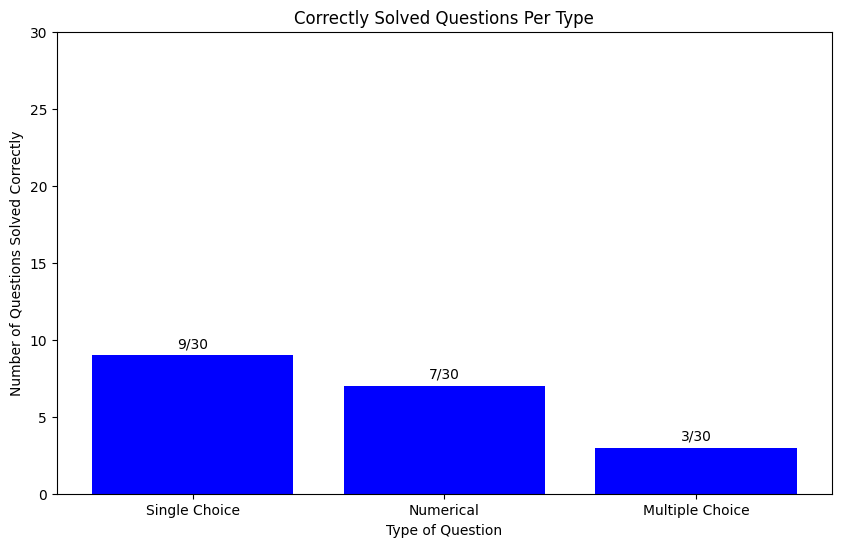

In [10]:
import matplotlib.pyplot as plt

# Define the data
type_of_question = ['Single Choice', 'Numerical', 'Multiple Choice']
number_correct = [9, 7, 3]  # Assuming 0 correct for Numerical and Multiple Choice for example

# Total questions for each type
total_questions = 30

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(type_of_question, number_correct, color='blue')

# Add labels and title
plt.xlabel('Type of Question')
plt.ylabel('Number of Questions Solved Correctly')
plt.title('Correctly Solved Questions Per Type')
plt.ylim(0, total_questions)  # Set y-axis limit to the total number of questions per type

# Adding the total number of questions as a text label on top of each bar
for i, correct in enumerate(number_correct):
    plt.text(i, correct + 0.5, f'{correct}/{total_questions}', ha='center')

# Show the plot
plt.show()

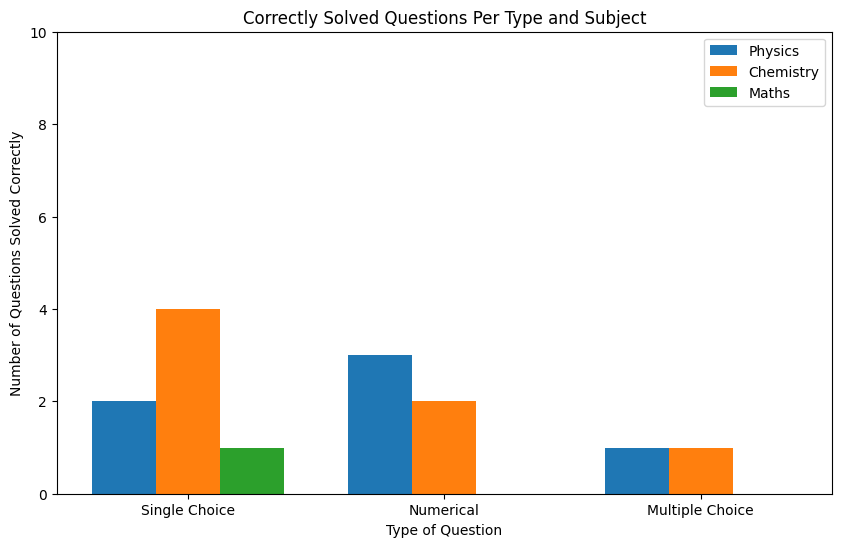

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
type_of_question = ['Single Choice', 'Numerical', 'Multiple Choice']
subjects = ['Physics', 'Chemistry', 'Maths']

# Assuming data for Numerical and Multiple Choice for example purposes
# Each sublist represents Physics, Chemistry, Maths respectively
correct_by_subject = {
    'Single Choice': [2, 4, 1],
    'Numerical': [3, 2, 0],  # Update these values based on your actual data
    'Multiple Choice': [1, 1, 0]  # Update these values based on your actual data
}

# Number of groups
num_groups = len(type_of_question)
num_subjects = len(subjects)

# Creating position of the bars on the x-axis
index = np.arange(num_groups)
bar_width = 0.25

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each subject
for i, subject in enumerate(subjects):
    # Extract the number of correct answers for the current subject from each question type
    correct_answers = [correct_by_subject[qtype][i] for qtype in type_of_question]
    ax.bar(index + i * bar_width, correct_answers, bar_width, label=subject)

# Add labels, title, and legend
ax.set_xlabel('Type of Question')
ax.set_ylabel('Number of Questions Solved Correctly')
ax.set_title('Correctly Solved Questions Per Type and Subject')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(type_of_question)
ax.set_ylim(0, 10)  
ax.legend()

# Show the plot
plt.show()


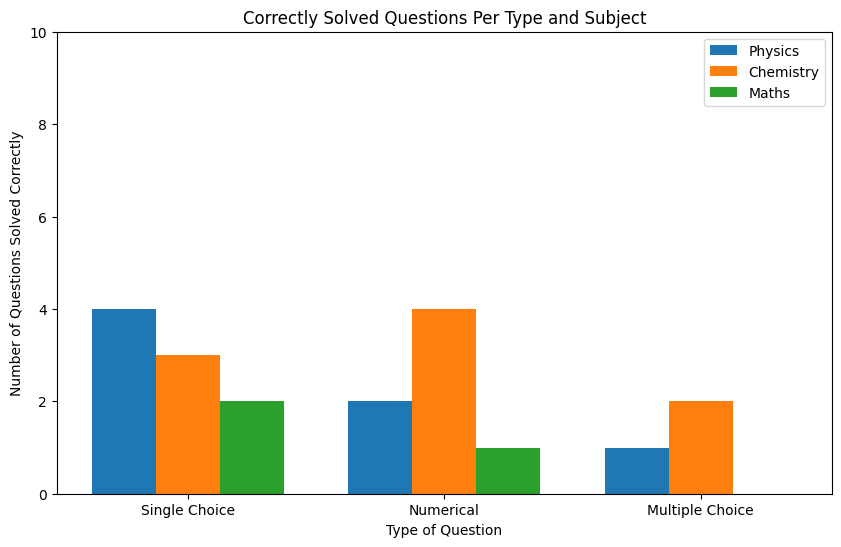

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
type_of_question = ['Single Choice', 'Numerical', 'Multiple Choice']
subjects = ['Physics', 'Chemistry', 'Maths']

# Example data: lists represent the correct answers for Physics, Chemistry, Maths respectively
# Update these with the actual number of questions solved correctly for each type and subject
correct_by_subject = {
    'Single Choice': [4, 3, 2],  # Example: 5 Physics, 7 Chemistry, 6 Maths
    'Numerical': [2, 4, 1],      # Example: 3 Physics, 4 Chemistry, 3 Maths
    'Multiple Choice': [1, 2, 0] # Example: 4 Physics, 5 Chemistry, 1 Maths
}

# Number of groups and subjects
num_groups = len(type_of_question)
num_subjects = len(subjects)

# Creating position of the bars on the x-axis
index = np.arange(num_groups)
bar_width = 0.25

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each subject
for i, subject in enumerate(subjects):
    # Extract the number of correct answers for the current subject from each question type
    correct_answers = [correct_by_subject[qtype][i] for qtype in type_of_question]
    ax.bar(index + i * bar_width, correct_answers, bar_width, label=subject)

# Add labels, title, and legend
ax.set_xlabel('Type of Question')
ax.set_ylabel('Number of Questions Solved Correctly')
ax.set_title('Correctly Solved Questions Per Type and Subject')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(type_of_question)
ax.set_ylim(0, 10)  # The maximum number of questions in any subcategory is 10
ax.legend()

# Show the plot
plt.show()


In [1]:
# from automatic_prompt_engineer import ape